<a href="https://colab.research.google.com/github/cuziam/Forest-fire-factor-analysis/blob/main/fire_over_5hecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 그래프에 한글 폰트를 적용하기 위해,'나눔' 폰트 패밀리 설치

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

2. 폰트 패밀리가 잘 설치되었는지 확인

In [2]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list


['DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans Display',
 'STIXGeneral',
 'cmmi10',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmtt10',
 'cmr10',
 'STIXSizeThreeSym',
 'cmb10',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmex10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'NanumSquare',
 'NanumSquare',
 'NanumMyeongjo Eco',
 'NanumGothic',
 'NanumSquareRound',
 'Liberation Sans Narrow',
 'NanumGothic Eco',
 'NanumSquare',
 'Nanum Pen Script',
 'NanumSquare_ac',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumMyeongjo YetHangul',
 'NanumGothic',
 'NanumGothic Eco',
 'Liberation Mono',
 'Liberation Sans

3. csv파일을 읽어온 후, 워드1~워드5까지의 요소 중 mean log value값 top10만 뽑아서 그래프 그리기

<ipython-input-4-a5d77fccb8c8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_cleaned.rename(columns={
<ipython-input-4-a5d77fccb8c8>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_cleaned.dropna(subset=['워드1', '워드2', '워드3', '워드4', '워드5', 'log'], inplace=True)
<ipython-input-4-a5d77fccb8c8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_cleaned[col] 

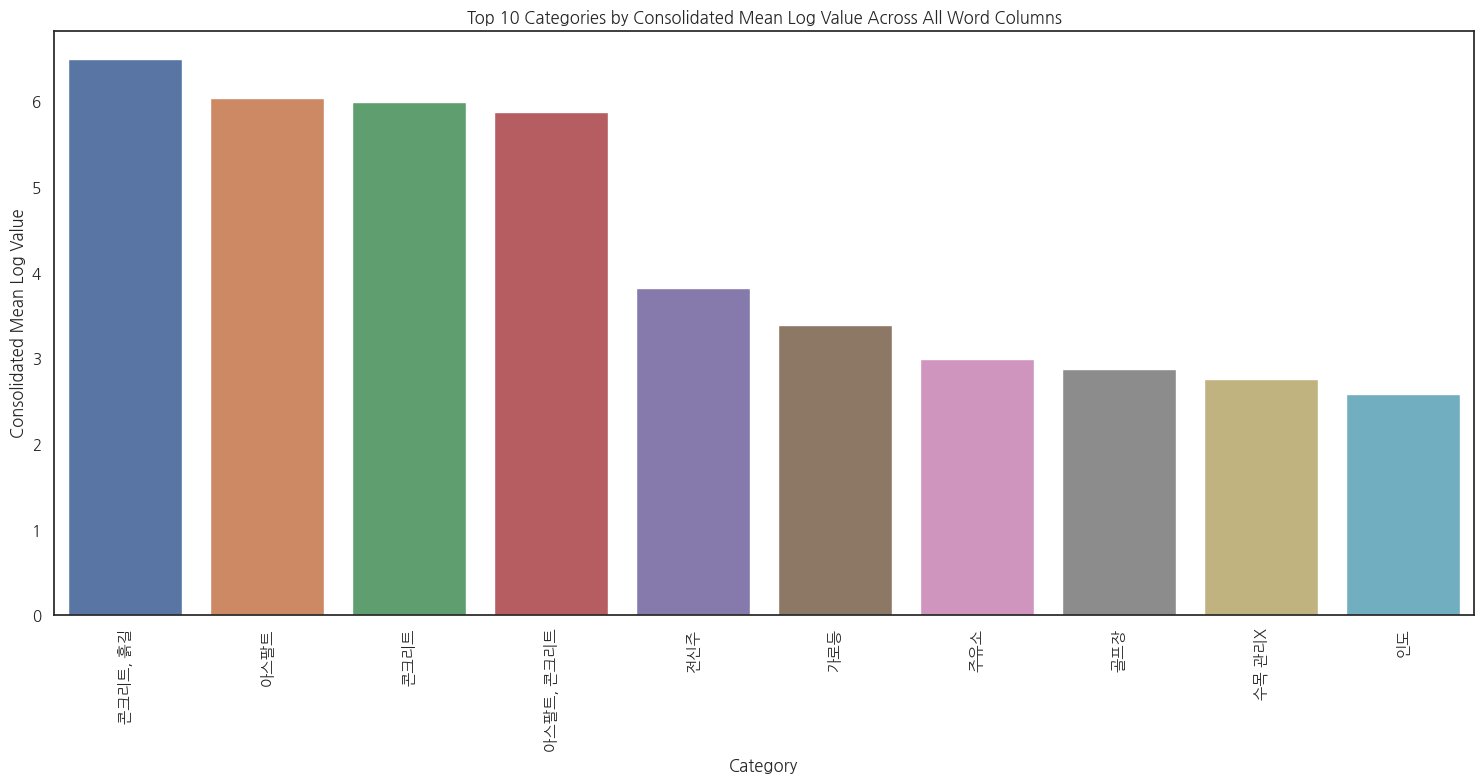

In [4]:

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "NanumGothic")
sns.set(font="NanumGothic",
rc={"axes.unicode_minus":False}, style='white')

# Read the CSV file (replace 'your_file.csv' with the actual file path)
df_csv = pd.read_csv('./rawData/fire-over-5hecs.csv')

# Skip irrelevant rows and columns to get to the actual data
df_csv_cleaned = df_csv.iloc[2:]
df_csv_cleaned.columns = df_csv.iloc[1]

# Rename the columns for easier access
df_csv_cleaned.rename(columns={
    'Unnamed: 23': '워드1',
    'Unnamed: 24': '워드2',
    'Unnamed: 25': '워드3',
    'Unnamed: 26': '워드4',
    'Unnamed: 27': '워드5',
}, inplace=True)

# Drop any rows where 'log' or 'Word' columns are NaN
df_csv_cleaned.dropna(subset=['워드1', '워드2', '워드3', '워드4', '워드5', 'log'], inplace=True)

# Convert 'Word' columns to string type and 'log' column to float type
for col in ['워드1', '워드2', '워드3', '워드4', '워드5']:
    df_csv_cleaned[col] = df_csv_cleaned[col].astype(str)
df_csv_cleaned['log'] = df_csv_cleaned['log'].astype(float)

# Create a DataFrame for consolidated mean log values across all 'Word' columns
consolidated_mean_log_values_csv = pd.concat([df_csv_cleaned[col] for col in ['워드1', '워드2', '워드3', '워드4', '워드5']],
                                             keys=['워드1', '워드2', '워드3', '워드4', '워드5']).reset_index()
consolidated_mean_log_values_csv.columns = ['Word_Column', 'Index', 'Category']
consolidated_mean_log_values_csv['log'] = df_csv_cleaned['log'].repeat(5).reset_index(drop=True)

# Calculate mean log value for each category across all 'Word' columns
group_means_consolidated_csv = consolidated_mean_log_values_csv.groupby('Category')['log'].mean().reset_index()
group_means_consolidated_csv.columns = ['Category', 'Consolidated_Mean_Log_Value']

# Sort by 'Consolidated_Mean_Log_Value' and take the top 10 categories
top10_overall_consolidated_csv = group_means_consolidated_csv.sort_values('Consolidated_Mean_Log_Value', ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(15, 8))
sns.barplot(data=top10_overall_consolidated_csv, x='Category', y='Consolidated_Mean_Log_Value')
plt.title('Top 10 Categories by Consolidated Mean Log Value Across All Word Columns')
plt.xlabel('Category')
plt.ylabel('Consolidated Mean Log Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


4. csv파일을 읽어온 후, 워드2~워드5까지의 요소 중 mean log value값 top8만 뽑아서 그래프 그리기

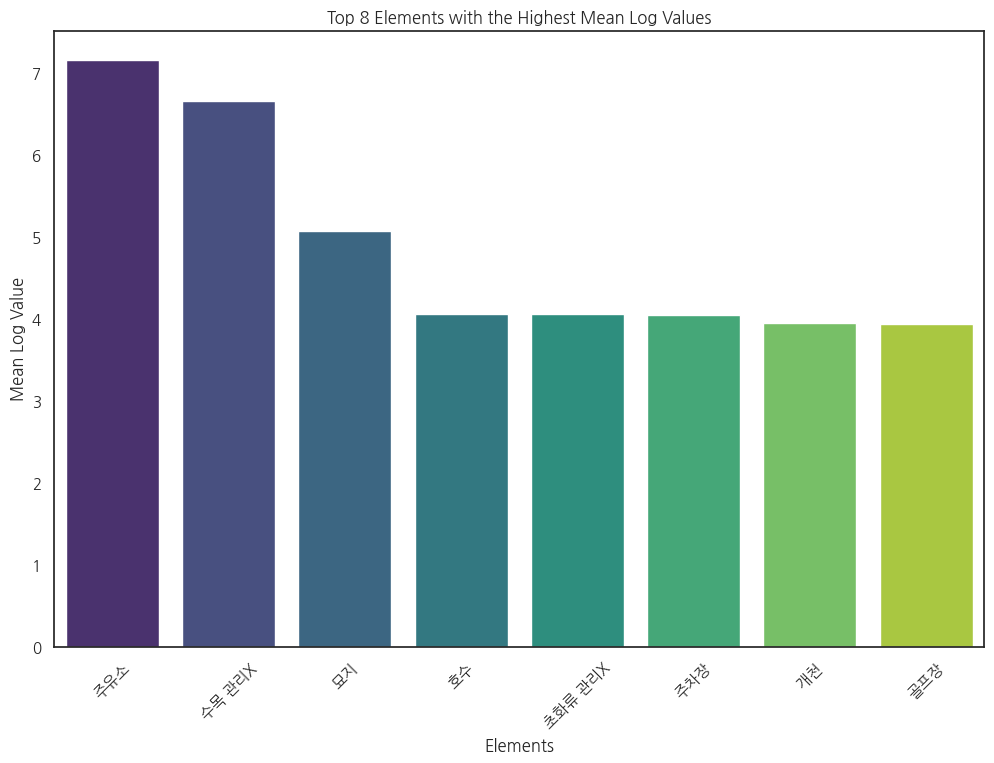

In [8]:
# CSV 파일을 읽어 DataFrame으로 변환 (불필요한 헤더 행은 생략)
df = pd.read_csv('./rawData/fire-over-5hecs.csv', skiprows=2)

# 관심 있는 컬럼과 'log' 컬럼만 추출
columns_of_interest = ['워드2', '워드3', '워드4', '워드5', 'log']
filtered_df = df[columns_of_interest]

# DataFrame을 'melt'하여 각 단어를 별개의 엔터티로 취급
melted_df = pd.melt(filtered_df, id_vars=['log'], value_vars=['워드2', '워드3', '워드4', '워드5'], value_name='Word')

# 각 단어별 평균 log 값을 계산
mean_log_values = melted_df.groupby('Word')['log'].mean().sort_values(ascending=False).reset_index()

# 상위 8개의 단어만 추출
top_8_elements = mean_log_values.head(8)

# 그래프 생성
plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='log', data=top_8_elements, palette='viridis')
plt.xlabel('Elements')
plt.ylabel('Mean Log Value')
plt.title('Top 8 Elements with the Highest Mean Log Values')
plt.xticks(rotation=45)
plt.show()